# Práctica 2

Importar Librerías

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Importar archivo CSV

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Programación/Deep_Learning/practica1_regresion/Advertising - Advertising.csv')
df.pop('Unnamed: 0')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Creación de la función para calcular la covarianza

In [ ]:
def covarianza(x,y):
  x_mean = np.mean(x)
  y_mean = np.mean(y)
  resta_x = x - x_mean
  resta_y = y - y_mean
  mult = resta_x * resta_y
  suma = sum(mult)
  return suma/len(x)

Calcular covarianza

In [ ]:
  colnames = ['TV', 'Radio', 'Newspaper']

  for col in colnames:
    print(covarianza(df[col],df['Sales']))

348.6382437499999
44.412509999999976
25.811684999999997


Creación de la función para calcular la correlación de Pearson

In [ ]:
def corr_Pearson(x,y):
  return covarianza(x,y)/math.sqrt(covarianza(x,x)*covarianza(y,y))

Calcular la correlación de Pearson

In [ ]:
  for col in colnames:
    print(corr_Pearson(df[col],df['Sales']))

0.7822244248616061
0.576222574571055
0.22829902637616528


Covarianza Multivariable

In [ ]:
todas_columnas = ['TV', 'Radio', 'Newspaper', 'Sales']
matriz = [['________'] + todas_columnas]

for fil in todas_columnas:
  fila = [fil]
  for col in todas_columnas:
    fila.append(covarianza(df[fil],df[col]))
  matriz.append(fila)

for row in matriz:
  print(row)

['________', 'TV', 'Radio', 'Newspaper', 'Sales']
['TV', 7334.095143750006, 69.51317999999996, 105.38985499999998, 348.6382437499999]
['Radio', 69.51317999999996, 219.32560400000003, 113.92449400000008, 44.412509999999976]
['Newspaper', 105.38985499999998, 113.92449400000008, 471.9367840000003, 25.811684999999997]
['Sales', 348.6382437499999, 44.412509999999976, 25.811684999999997, 27.085743749999985]


Tabla de correlación

In [ ]:
print(df[todas_columnas].corr())

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


Generar mapa de calor

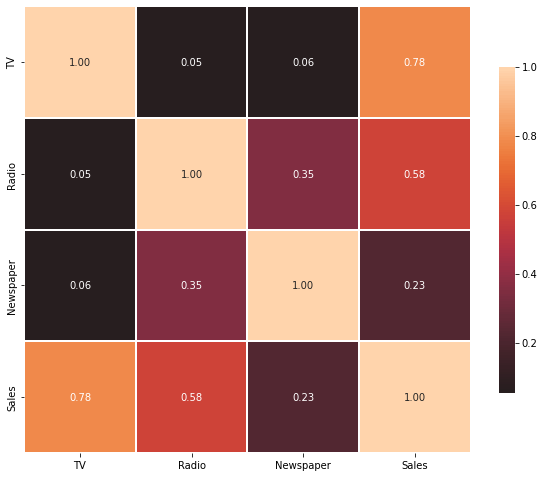

In [ ]:
def mapa_de_calor_correlacion(data):
    correlaciones = df[colnames].corr()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlaciones, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=1, annot=True, cbar_kws={"shrink": .60})
    plt.show();
colnames = ['TV', 'Radio', 'Newspaper', 'Sales']

mapa_de_calor_correlacion(df)

Creación de funciones para calcular Hipótesis, MSE, costo y graficar los resultados

In [ ]:
def hipotesis(x, theta0, theta1):
  return (x*theta1) + theta0

def MSE(h, y):
  return sum((h-y)**2)/(2*len(h))

def costo(x, y, theta0, theta1):
  h = hipotesis(x, theta0, theta1)
  mse = MSE(h, y)
  return h, mse

def grafica(x, y, theta0, theta1):
  h, mse = costo(x, y, theta0, theta1)
  plt.plot(x, y, marker='.', linestyle='none')
  plt.plot(x, h)
  plt.show()
  return h, mse

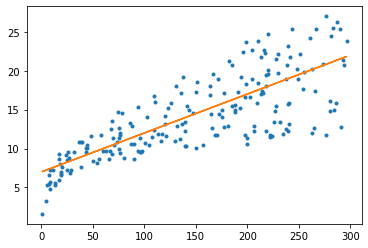

MSE =  5.3329049375


In [ ]:
theta0, theta1 = 7, 0.05
x, y = df['TV'], df['Sales']
h, mse = grafica(x, y, theta0, theta1)
print('MSE = ', mse)

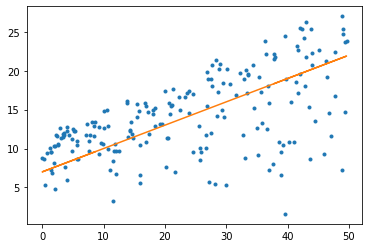

MSE =  10.0897085


In [ ]:
theta0, theta1 = 7, 0.3
x, y = df['Radio'], df['Sales']
h, mse = grafica(x, y, theta0, theta1)
print('MSE = ', mse)

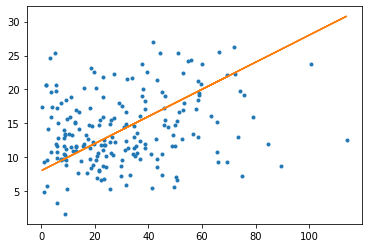

MSE =  17.823168999999996


In [ ]:
theta0, theta1 = 8, 0.2
x, y = df['Newspaper'], df['Sales']
h, mse = grafica(x, y, theta0, theta1)
print('MSE = ', mse)

La hipótesis durante algún tiempo se calculó al tanteo como en los pasos anteriores, sin embargo se desarrolló el algoritmo del gradiente descendiente para que la máquina lo hiciera automáticamente.
Hay que recordar que mejorar la hipótesis, es sinónimo de aprender en aprendizaje automático.

## Gradiente Descendente

In [ ]:
def grad_desc(x, y, theta0, theta1, alpha, epocas):
  for n in range(epocas):
    hip = theta1 * x + theta0
    theta_0 = (alpha/len(y)) * sum((hip - y))
    theta_0 = theta0 - theta_0
    theta_1 = sum(x * (hip - y))
    theta_1 = theta_1 * (alpha/len(y))
    theta_1 = theta1 - theta_1
    theta0 = theta_0
    theta1 = theta_1
  return theta_0, theta_1

### Columna 'TV' y 'Sales'

Calculamos el gradiente descendente para 'TV' y 'Sales' con un alfa de 0.1

In [ ]:
theta0, theta1 = 1, 1
x, y = df['TV'], df['Sales']
theta_0, theta_1 = grad_desc(x, y, theta0, theta1, 0.1, 10)
print(theta_0,theta_1)

1.9332564619191894e+32 3.8069330695946453e+34


Graficamos y calculamos el costo MSE

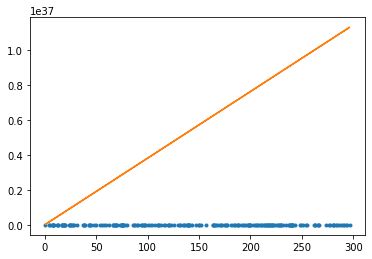

El MSE =  2.0983374628791376e+73


In [ ]:
x, mse = grafica(x, y, theta_0, theta_1)
print('El MSE = ', mse)

Calculamos el gradiente descendente para 'TV' y 'Sales' con un alfa de 0.01

In [ ]:
theta0, theta1 = 1, 1
x, y = df['TV'], df['Sales']
theta_0, theta_1 = grad_desc(x, y, theta0, theta1, 0.01, 10)
print(theta_0,theta_1)

1.8739816948037367e+22 3.690210288334511e+24


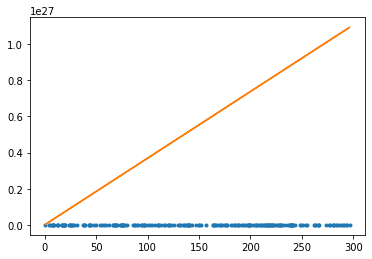

El MSE =  1.9716375564388188e+53


In [ ]:
x, mse = grafica(x, y, theta_0, theta_1)
print('El MSE = ', mse)

Calculamos el gradiente descendente para 'TV' y 'Sales' con un alfa de 0.001

In [ ]:
theta0, theta1 = 1, 1
x, y = df['TV'], df['Sales']
theta_0, theta_1 = grad_desc(x, y, theta0, theta1, 0.001, 10)
print(theta_0,theta_1)

1365073419360.844 268807747184595.62


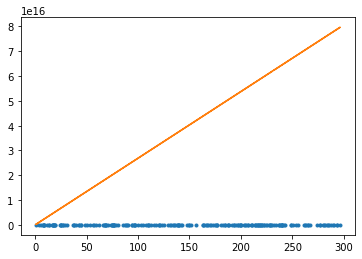

El MSE =  1.0461848191033804e+33


In [ ]:
x, mse = grafica(x, y, theta_0, theta_1)
print('El MSE = ', mse)

### Columna 'Radio' y 'Sales'

Calculamos el gradiente descendente para 'Radio' y 'Sales' con un alfa de 0.1

In [ ]:
theta0, theta1 = 1, 1
x, y = df['Radio'], df['Sales']
theta_0, theta_1 = grad_desc(x, y, theta0, theta1, 0.1, 10)
print(theta_0,theta_1)

9.508325269177558e+16 3.1072539467680266e+18


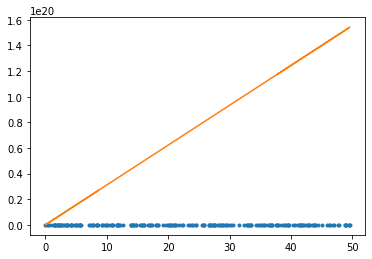

El MSE =  3.678391590458267e+39


In [ ]:
x, mse = grafica(x, y, theta_0, theta_1)
print('El MSE = ', mse)

Calculamos el gradiente descendente para 'Radio' y 'Sales' con un alfa de 0.01

In [ ]:
theta0, theta1 = 1, 1
x, y = df['Radio'], df['Sales']
theta_0, theta_1 = grad_desc(x, y, theta0, theta1, 0.01, 10)
print(theta_0,theta_1)

2654099.2836710536 86734061.90879864


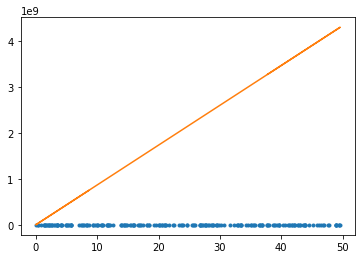

El MSE =  2.8660504521388365e+18


In [ ]:
x, mse = grafica(x, y, theta_0, theta_1)
print('El MSE = ', mse)

Calculamos el gradiente descendente para 'Radio' y 'Sales' con un alfa de 0.001

In [ ]:
theta0, theta1 = 1, 1
x, y = df['Radio'], df['Sales']
theta_0, theta_1 = grad_desc(x, y, theta0, theta1, 0.001, 10)
print(theta_0,theta_1)

1.0073580805290359 0.45661050467883435


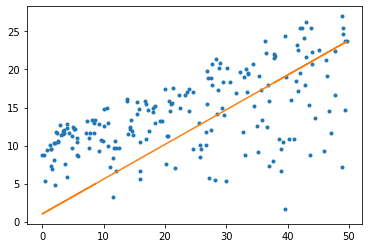

El MSE =  18.989756669457837


In [ ]:
x, mse = grafica(x, y, theta_0, theta_1)
print('El MSE = ', mse)

### Columna 'Newspaper' y 'Sales'

Calculamos el gradiente descendente para 'Newspaper' y 'Sales' con un alfa de 0.1

In [ ]:
theta0, theta1 = 1, 1
x, y = df['Newspaper'], df['Sales']
theta_0, theta_1 = grad_desc(x, y, theta0, theta1, 0.1, 10)
print(theta_0,theta_1)

4.271774898047726e+19 1.9645467957977348e+21


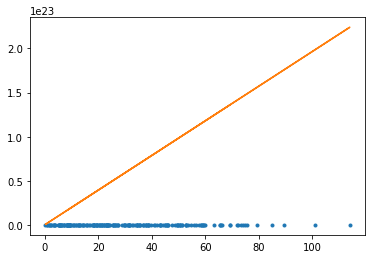

El MSE =  2.7147579310091916e+45


In [ ]:
x, mse = grafica(x, y, theta_0, theta_1)
print('El MSE = ', mse)

Calculamos el gradiente descendente para 'Newspaper' y 'Sales' con un alfa de 0.01

In [ ]:
theta0, theta1 = 1, 1
x, y = df['Newspaper'], df['Sales']
theta_0, theta_1 = grad_desc(x, y, theta0, theta1, 0.01, 10)
print(theta_0,theta_1)

2193904345.179624 100895479088.06487


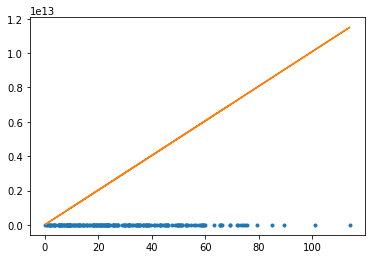

El MSE =  7.160605830945257e+24


In [ ]:
x, mse = grafica(x, y, theta_0, theta_1)
print('El MSE = ', mse)

Calculamos el gradiente descendente para 'Newspaper' y 'Sales' con un alfa de 0.001

In [ ]:
theta0, theta1 = 1, 1
x, y = df['Newspaper'], df['Sales']
theta_0, theta_1 = grad_desc(x, y, theta0, theta1, 0.001, 10)
print(theta_0,theta_1)

1.0229125040765064 0.3011089041398402


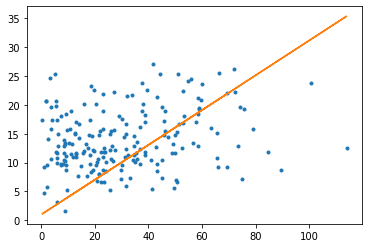

El MSE =  34.383311999147516


In [ ]:
x, mse = grafica(x, y, theta_0, theta_1)
print('El MSE = ', mse)

## Generalización de Gradiente Descendente

En esta sección, se probará la función del gradiente descendente vectorizada. Esto quiere decir, que será una función generalizada, con la que se podrá calcular las mejores thetas para una regresión lineal en la que existen muchas variables X. 
Igualmente en esta parte se normalizarán los datos, con el propósito de obtener mejores resultados para las thetas, por lo que se creará una función para tal propósito.

In [ ]:
import random

# Función del Gradiente Descendente Vectorizada
def Gradiente_Vectorizada(Matriz_X, Y, alpha, iteraciones):
  n = np.shape(Matriz_X)
  p = np.shape(n)
  if p[0]==1:
    n = 1
  else:
    n = n[1]
  # Generar números aleatorios para las thetas dependiendo de la cantidad de variables en X
  thetas = random.sample(range(0,20), n+1)

  # Añadir columna de 1's a la matriz X
  unos = np.ones(len(Y))
  X = np.vstack([unos, Matriz_X.T])
  X = X.T

  for m in range(iteraciones):
    # Multiplicar X.0
    X_0 = X @ thetas
    # Restar X.0 - Y
    h_Y = X_0 - Y.T
    # Multiplicar (X.0 - Y) * X.T
    j_0 = X.T @ h_Y
    # Multiplicar alpha/m * j_0
    mult = (alpha/len(Y)) * j_0
    # Restar a thetas - mult
    thetas = thetas - mult
  return thetas

In [ ]:
# Función de estádarización para normalizar los datos
# Función para normalizar los datos, aplicando la fórmula de estandarización general
def Estandarizacion(DF):
  n = DF.shape
  columnas = n[1]
  num_ele = len(DF.iloc[:,0])
  DF_new = DF

  # Ciclo for para estandarizar por columna
  for m in range(columnas):
    mean = sum(DF.iloc[:,m])/num_ele
    std_dev = np.sqrt((sum((DF.iloc[:,m]-mean)**2)/num_ele))
    x_new = (DF.iloc[:,m] - mean)/std_dev
    DF.iloc[:,m] = x_new

  return DF

Estandarizamos los datos

In [ ]:
df_est = Estandarizacion(df)
df_est

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


In [ ]:
x, y = df_est[['TV','Radio','Newspaper']], df_est['Sales']
thetas = Gradiente_Vectorizada(x, y, 0.001, 1000)
print(thetas)

[ 0.73539085  6.01462926 -1.1443052   6.44756133]
